# Exercises

## Regression

* [Linear Regression](#1.)
* [Support Vector Regression](#2.)


## Classification

* [K-Nearest Neighbour (KNN) Classification](#3.)
* [Support Vector Machine (SVM) Classification](#4.)


## Clustering

* [K-Means Clustering](#5.)


## Other Content

* [Principal Component Analysis (PCA)](#6.)

# Exercise 1: Regression
<a class="anchor" id="1."></a> 
## Linear Regression

In [2]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import data linear-regression-dataset.csv located in data folder
data = pd.read_csv('../data/linear-regression-dataset.csv')

### 1. Print info and first 5 rows

- Expected output:
```python
>>> <class 'pandas.core.frame.DataFrame'>
>>> RangeIndex: 14 entries, 0 to 13
>>> Data columns (total 2 columns):
>>>  #   Column   Non-Null Count  Dtype  
>>> ---  ------   --------------  -----  
>>> 0   experience  14 non-null     float64
>>> 1   salary      14 non-null     int64  
>>> dtypes: float64(1), int64(1)
>>> memory usage: 352.0 bytes
>>> None
>>>   experience  salary
>>> 0      0.5  2500
>>> 1      0.0  2250
>>> 2      1.0  2750
>>> 3      5.0  8000
>>> 4      8.0  9000
```

In [4]:
# Your code here
data.info()
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   experience  14 non-null     float64
 1   salary      14 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes
   experience  salary
0         0.5    2500
1         0.0    2250
2         1.0    2750
3         5.0    8000
4         8.0    9000


### 2. Plot experience data

- Expected output:
![experience1](../data/experience1.png)

Text(0, 0.5, 'salary')

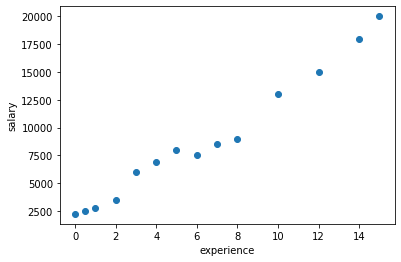

In [5]:
# Your code here
plt.plot(data['experience'], data['salary'], 'o')
plt.xlabel('experience')
plt.ylabel('salary')

### 3. Compute the score and correlation using the `LinearRegression` model

- Expected output:

```Python
>>> R sq:  0.9775283164949902
>>> Correlation:  0.9887003168275967
```

In [6]:
!pip install sklearn

In [49]:
# Your code here
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
X = data['experience'].to_numpy().reshape((-1,1))
Y = data['salary'].to_numpy()
model = LinearRegression()
model.fit(X,Y)
r_sq = model.score(X, Y)
corr = pearsonr(data['experience'],data['salary'])

In [8]:
print('R sq : ', r_sq)
print('Correlation : ', corr[0])

R sq :  0.9775283164949903
Correlation :  0.9887003168275968


### 4. Predict the result of x = 11
- Expected output:

```Python
>>> Coefficient for X:  [[1138.34819698]]
>>> Intercept for X:  [1663.89519747]
>>> Regression line is: y = 1663.895197474103 + (x * 1138.3481969755721)
>>> Value of y is: 14181
>>> The predicted value y is: [[14185.72536421]]
```

In [50]:
# Your code here
import numpy as np
x_11 = np.array(11).reshape((-1,1))
pred_11 = model.predict(x_11)
print('Coefficient for X:  ', model.coef_)
print('Intercept for X:  ', model.intercept_)
print('Regression line is: y = '+ str(model.intercept_) +' + (x * '+ str(model.coef_) +' )')
print('Value of y is: ', )
print('The predicted value y is: ', pred_11)

Coefficient for X:   [1138.34819698]
Intercept for X:   1663.8951974741067
Regression line is: y = 1663.8951974741067 + (x * [1138.34819698] )
Value of y is: 
The predicted value y is:  [14185.72536421]


### 5. Plot both y_head (predicted values) and experience data
- Input:
```python
>>> # visualize line
>>> array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  # experience
```

- Expected output:
    
![experience2](../data/experience2.png)

ValueError: x and y must have same first dimension, but have shapes (14,) and (16,)

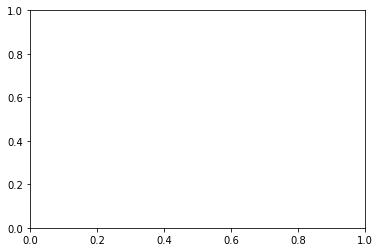

In [51]:
# Your code here
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)
y_new = model.predict(X)
predict_array = model.predict(array)
plt.plot(y_new, predict_array, 'o')

### 6. Predict values of experience input data and compute the r square score using `r2_score()` function

- Expected output:
```python
>>> r_square score:  0.9775283164949902
```

In [11]:
# Your code here


<a class="anchor" id="2."></a> 
# Support Vector Regression

In [19]:
# import library
from sklearn import svm
from sklearn.model_selection import train_test_split

In [13]:
# import data salary.csv
data_salary = pd.read_csv('../data/salary.csv')

### 1. Print info and first 5 rows

In [14]:
# Your code here
print(data_salary.info, '\n')
print(data_salary.head())

<bound method DataFrame.info of                   title  Education level  salary
0                 Cayci                1    2250
1             Secretary                2    2500
2  Assistant Specialist                3    3000
3                Expert                4    4000
4       Project manager                5    5500
5                  Chef                6    7500
6               Manager                7   10000
7              Director                8   15000
8               C-level                9   25000
9                   CEO               10   50000> 

                  title  Education level  salary
0                 Cayci                1    2250
1             Secretary                2    2500
2  Assistant Specialist                3    3000
3                Expert                4    4000
4       Project manager                5    5500


### 2.  Plot the salary over the education level

- Expected output:

![salary1](../data/salary1.png)

Text(0, 0.5, 'salary')

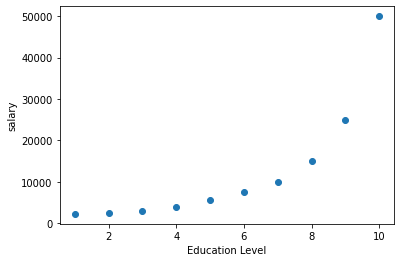

In [15]:
# Your code here
plt.plot(data_salary['Education level'], data_salary['salary'], 'o')
plt.xlabel('Education Level')
plt.ylabel('salary')

### 3. Compute the score using `SVR` model (rbf as kernel), and plot the predicted values

- Expected output:

![salary1](../data/salary2.png)

```python
>>> R sq:  0.7513836788854973
```

In [21]:
# Your code here
y = data_salary['salary']
X = data_salary[['title', 'Education level']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=99)
model_svm = svm.SVR(kernel='rbf')
 
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

# from sklearn import metrics
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plt.plot(y_pred, 'o', 'r')

ValueError: could not convert string to float: 'Project manager'

# Classification
<a class="anchor" id="3."></a> 
# K-Nearest Neighbour (KNN) Classification

In [73]:
# import library

In [74]:
# import data data-classification.csv

### 1. Drop the `id` and `Unnamed: 32` columns 

In [124]:
# Your code here

### 2. Plot `texture_mean` over `radius_mean` for both benign and malignant diagnosis

- Expected output:
![radius](../data/radius.png)

In [ ]:
# Your code here

### 3. Comment the code below

> Your answer here


In [54]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

### 4. Split your data into train and test subsets using `train_test_split()` (30% for testing)

In [131]:
# Your code here

### 5. KNeighborsClassifier model
    a. Comment the code below
- Input:
```python
# knn model
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
>>> knn.fit(x_train,y_train)
>>> prediction = knn.predict(x_test)
>>> print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))
```
> Your answer here

    b. Use the previous code to find the best k value
    
        - Expected ouput:
![kvalue](../data/kvalues.png)
    
    c. Use the best k value and compute the score
        - Expected ouput:

```python
>>>  3 nn score: 0.9649122807017544 
```

In [ ]:
# Your code here

### Plot the confusion matrix

- Expected output:
![matrix](../data/confusion-matrix.png)

In [ ]:
# Your code here


<a class="anchor" id="4."></a> 
# Support Vector Machine (SVM) Classification

### 1. Comment the code below
> Your answer here

In [21]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

### 2.  Use the same splitted data as before and use SVC model to compyte the new score

- Expected output:
```python
>>> print accuracy of svm algo:  0.9649122807017544
```

In [ ]:
# Your code here

### 3. Plot the confusion matrix
- Expected output:

![confusion-matrix](../data/confusion-matrix-svm.png)

In [135]:
# Your code here

# Clustering
<a class="anchor" id="5."></a> 
# K-Means Clustering

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% create dataset
# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

### 1. Concatenating arrays:
    - x1, x2, x3 to create x array
    - y1, y2, y3 to create y array

In [143]:
# Your code here

### 2. Create new dataframe using x and y arrays

- Expected output:
```python
>>>           x          y
>>> 0  31.156168  31.733629
>>> 1  23.429376  35.245182
>>> 2  18.648253  28.094688
>>> 3  31.002996  18.067875
>>> 4  20.030422  26.872852
```

In [145]:
# Your code here

### 3. Plot the data

- Expected output:

![kmeans](../data/kmeans-assignment1.png)

In [143]:
# Your code here

### 4. Using KMeans compute the WCSS for k=1,...k=15 and plot the it
- Expected output:

![kmeans](../data/kmeans-assignment2.png)    

In [143]:
# Your code here

### 5. Using k=3 predict the data clusters
- Expected output:
![kmeans](../data/kmeans-assignment3.png)    

In [143]:
# Your code here


<a class="anchor" id="6."></a> 
# Principal Component Analysis (PCA)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
# %%
iris = load_iris()

feature_names = iris.feature_names
y = iris.target

data = pd.DataFrame(iris.data,columns = feature_names)
data["sinif"] = y

x = iris.data
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   sinif              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   sinif  
0      0  
1      0

In [3]:
#%% PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(x)

x_pca = pca.transform(x)

print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.9776852063187949


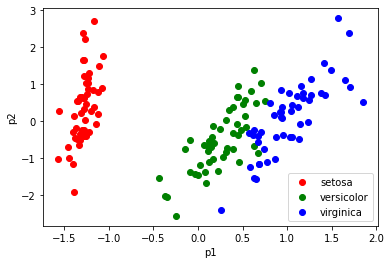

In [4]:
#%% 2D
data["p1"] = x_pca[:,0]
data["p2"] = x_pca[:,1]

color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(data.p1[data.sinif == each],data.p2[data.sinif == each],color = color[each],label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.savefig("../data/pca.png")

plt.show()